### Import the Libraries

In [115]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import pylab as pl

In [116]:
det_class_info = 'stage_2_detailed_class_info.csv'
train_bbox = 'stage_2_train_labels.csv'
train_img_dir = 'stage_2_train_images'
test_img_dir = 'stage_2_test_images'

### Pre-Processing, Data Visualization, EDA

#### Loading detailed class info file

In [117]:
class_df = pd.read_csv(det_class_info)

In [118]:
class_df.shape

(30227, 2)

In [119]:
class_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [120]:
print(class_df.shape[0], 'class infos loaded')

30227 class infos loaded


In [121]:
print('Total No of Patients', class_df['patientId'].value_counts().shape[0])

Total No of Patients 26684


In [122]:
print('Total distinct classes: ', class_df['class'].unique())

Total distinct classes:  ['No Lung Opacity / Not Normal' 'Normal' 'Lung Opacity']


#### We see there are 3 classes, Normal, Lung Opacity and No Lung Opacity/Not Normal
#### No Lung Opacity/Not Normal are cases that look like opacity but are not. 

#### Check for duplicates in patient id

In [123]:
##Identify duplicates records in the data
dupes = class_df['patientId'].duplicated()
sum(dupes)

3543

#### 3543 patients have multiple X rays

<AxesSubplot:xlabel='class'>

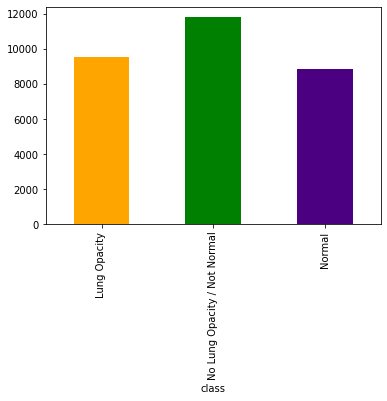

In [124]:
class_df.groupby('class').size().plot.bar(5, 10, color=['Orange', 'green', 'Indigo'])

#### Load CSV file containing training set patientIds and labels (Bounding Boxes)

In [125]:
df_labels = pd.read_csv(train_bbox)

In [126]:
df_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


#### We see patient ids, and bounding box is present in the dataset. 0 means No Pneumonia, 1 means Pneumonia
#### Bounding Box is not present when the patient doesnot have pneumonia, however 0 can mean No Lung Opacity/Not Normal¶

In [127]:
df_labels.shape

(30227, 6)

#### There are 30,227 patient ids

#### Checking the dataset information

In [128]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [129]:
df_labels.describe()

,x,y,width,height,Target
count,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,394.047724,366.839560,218.471376,329.269702,0.316108
std,204.574172,148.940488,59.289475,157.750755,0.464963
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,207.000000,249.000000,177.000000,203.000000,0.000000
50%,324.000000,365.000000,217.000000,298.000000,0.000000
75%,594.000000,478.500000,259.000000,438.000000,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


#### Checking duplicates if it matches with class info file

In [130]:
##Identify duplicates records in the data
dupes = df_labels['patientId'].duplicated()
sum(dupes)

3543

#### 3543 patients have multiple X rays

#### Check for missing values

In [131]:
print(" \nCount total NaN at each column in the dataset : \n\n", 
      df_labels.isnull().sum())

 
Count total NaN at each column in the dataset : 

 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64


#### From the above only columns x, y, width, height is having null
#### This is fine since bounding box can be null if there is no pneumonia

#### Let's read the training data in the stage_2_train_images folder
#### We will use pydicom library, the patient id in stage_2_train_labels.csv file will have a file with patientid.dcm

In [132]:
def checkXray(i, dirName):
    patientId = df_labels['patientId'][i]
    print("Patient Id: ", patientId)
    fileName = dirName + "/" + patientId
    print("\nBounding Box Coordinates, X: ", df_labels['x'][i])
    print("\nBounding Box Coordinates, Y: ", df_labels['y'][i])
    print("\nBounding Box Coordinates, Width: ", df_labels['width'][i])
    print("\nBounding Box Coordinates, Height: ", df_labels['height'][i])
    
    patient_file = '%s.dcm' % fileName
    patient_data = pydicom.read_file(patient_file)
    print(patient_data)
    
    plt.imshow(patient_data.pixel_array,cmap=pl.cm.gist_gray)
    

#### Let's take a look into an image of a person who has normal lungs

Patient Id:  003d8fa0-6bf1-40ed-b54c-ac657f8495c5

Bounding Box Coordinates, X:  nan

Bounding Box Coordinates, Y:  nan

Bounding Box Coordinates, Width:  nan

Bounding Box Coordinates, Height:  nan
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.2293.1517874295.733882
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(000

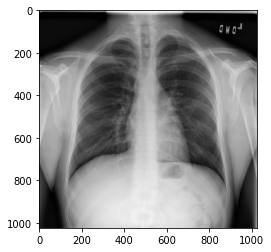

In [133]:
checkXray(3, train_img_dir)

#### Let's take a look into an image of a person who has lung opacity

Patient Id:  00436515-870c-4b36-a041-de91049b9ab4

Bounding Box Coordinates, X:  264.0

Bounding Box Coordinates, Y:  152.0

Bounding Box Coordinates, Width:  213.0

Bounding Box Coordinates, Height:  379.0
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Stor

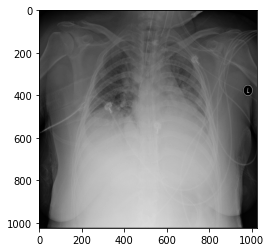

In [134]:
checkXray(4, "stage_2_train_images")

#### The images contain combination of header metadata as well as underlying raw image arrays for pixel data

#### Let's take a look into an image of a person who has No Lung Opacity/Not Normal¶

Patient Id:  0004cfab-14fd-4e49-80ba-63a80b6bddd6

Bounding Box Coordinates, X:  nan

Bounding Box Coordinates, Y:  nan

Bounding Box Coordinates, Width:  nan

Bounding Box Coordinates, Height:  nan
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(00

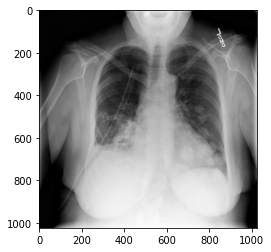

In [135]:
checkXray(0, "stage_2_train_images")